# 1. Importation de libraires

In [34]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import json
from wordcloud import WordCloud
import cv2
import os
from pandas import json_normalize
import codecs
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
import emoji
from wordcloud import WordCloud
from gensim import models
from gensim.corpora.dictionary import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\benab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\benab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\benab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 2. Analyse

## 2.1. Chargement des données

In [35]:
path_dataset = 'C:/Users/benab/OneDrive/Documents/OC/OC_P6/text/'

In [36]:
path_dataset

'C:/Users/benab/OneDrive/Documents/OC/OC_P6/text/'

In [37]:
with open(path_dataset + 'yelp_academic_dataset_business.json') as json_data:
    print(type(json_data))

<class '_io.TextIOWrapper'>


In [38]:
df = pd.read_json(path_dataset + 'yelp_academic_dataset_business.json', lines=True)

print(df.to_string()) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [39]:
df

business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  5255 E Broadway Blvd         Tucson    AZ       85711   
3                           935 Race St   Philadelphia    PA       19107   
4                         101 Walnut St     Green Lane    PA       18054   
...                                 ...            ...   ...         ...   
150341                3388 Gateway Blvd       Edmonton    AB     T6J 5H2   
150342               2813 Bransford Ave      Nashville    TN       37204   
150343           6020 E 82nd St, Ste 46   Indianapolis    IN       46250   
150344                     2472 Troy Rd   Edwardsville    IL       62025   
150345            238 Apollo Beach Blvd   Apollo beach    FL       33572   

         latitude   longitude  stars  review_count  is_open  \
0       34.426679 -119.711197    5.0             7        0   
1       38.551126  -90.335695    3.0            15        1   
2       32.223236 -110.880452    3.5            22        0   
3       39.955505  -75.155564    4.0            80        1   
4       40.338183  -75.471659    4.5            13        1   
...           ...         ...    ...           ...      ...   
150341  53.468419 -113.492054    3.0            13        1   
150342  36.115118  -86.766925    4.0             5        1   
150343  39.908707  -86.065088    3.5             8        1   
150344  38.782351  -89.950558    4.0            24        1   
150345  27.771002  -82.394910    4.5             9        1   

                                               attributes  \
0                           {'ByAppointmentOnly': 'True'}   
1                  {'BusinessAcceptsCreditCards': 'True'}   
2       {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3       {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4       {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   
...                                                   ...   
150341  {'ByAppointmentOnly': 'False', 'RestaurantsPri...   
150342  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
150343  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
150344  {'BusinessParking': '{'garage': False, 'street...   
150345  {'WheelchairAccessible': 'True', 'BusinessAcce...   

                                               categories  \
0       Doctors, Traditional Chinese Medicine, Naturop...   
1       Shipping Centers, Local Services, Notaries, Ma...   
2       Department Stores, Shopping, Fashion, Home & G...   
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                               Brewpubs, Breweries, Food   
...                                                   ...   
150341                         Nail Salons, Beauty & Spas   
150342  Pets, Nurseries & Gardening, Pet Stores, Hobby...   
150343  Shopping, Jewelry, Piercing, Toy Stores, Beaut...   
150344  Fitness/Exercise Equipment, Eyewear & Optician...   
150345  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   

                                                    hours  
0                                                    None  
1       {'Monday': '0:0-0:0', 'Tuesday': '

In [40]:
df.shape

(150346, 14)

Le fichier est composé de 150 346 établissements.

## 2.3.Traitement des données

On va trier ces données pour ne récupérer que les établissements avec la catégorie non vide et la catégorie liée à la restauration.

In [41]:
data_business = df[['business_id', 'categories']].dropna(subset=['categories'])

In [90]:
categories = {}

def count_categories(cat):
    values = [x.strip() for x in cat.split(',')]

    for value in values:
        if value in categories.keys():
            categories[value] += 1
        else:
            categories[value] = 1

data_business['categories'].apply(lambda x : count_categories(x))

3         None
4         None
5         None
8         None
9         None
          ... 
150327    None
150328    None
150336    None
150339    None
150340    None
Name: categories, Length: 64577, dtype: object

In [43]:
sort_count_cat = dict(sorted(categories.items(), key=lambda item: item[1], reverse=True))
sort_count_cat.items()

dict_items([('Restaurants', 52268), ('Food', 27781), ('Shopping', 24395), ('Home Services', 14356), ('Beauty & Spas', 14292), ('Nightlife', 12281), ('Health & Medical', 11890), ('Local Services', 11198), ('Bars', 11065), ('Automotive', 10773), ('Event Planning & Services', 9895), ('Sandwiches', 8366), ('American (Traditional)', 8139), ('Active Life', 7687), ('Pizza', 7093), ('Coffee & Tea', 6703), ('Fast Food', 6472), ('Breakfast & Brunch', 6239), ('American (New)', 6097), ('Hotels & Travel', 5857), ('Home & Garden', 5799), ('Fashion', 5739), ('Burgers', 5636), ('Arts & Entertainment', 5434), ('Auto Repair', 5433), ('Hair Salons', 5046), ('Nail Salons', 4621), ('Mexican', 4600), ('Italian', 4573), ('Specialty Food', 4233), ('Doctors', 3763), ('Pets', 3758), ('Real Estate', 3577), ('Seafood', 3539), ('Fitness & Instruction', 3293), ('Professional Services', 3270), ('Hair Removal', 3239), ('Desserts', 3186), ('Chinese', 3169), ('Bakeries', 3150), ('Grocery', 3139), ('Salad', 3064), ('Hot

In [44]:
# On ne garde que les établissements correspondants aux catégories suivantes
selected_categories = ['Restaurants', 'Food', 'Sandwiches', 'Pizza', 'Fast Food', 'Breakfast & Brunch', 'Burgers', 'Mexican', 'Italian', 'Seafood', 
'Chinese', 'Chicken Wings', 'Japanese', 'Sushi Bars', 'Barbeque', 'Steakhouses', 'Food Trucks', 'Mediterranean', 'Donuts', 'Soup', 'Tacos', 'Thai', 
'Tex-Mex', 'Vietnamese', 'Indian', 'Greek', 'Hot Dogs', 'Bagels', 'Cheesesteaks', 'French', 'Korean']

In [45]:
# Vérifie si une catégorie est dans la liste des catégories sélectionnées
def check_cat(cat):
    values = [x.strip() for x in cat.split(',')]

    for value in values:
        if value in selected_categories:
            return True
    
    return False

In [46]:
data_business = data_business[data_business['categories'].apply(lambda x : check_cat(x))]
data_business

business_id  \
3       MTSW4McQd7CbVtyjqoe9mw   
4       mWMc6_wTdE0EUBKIGXDVfA   
5       CF33F8-E6oudUQ46HnavjQ   
8       k0hlBqXX-Bt0vf1op7Jr1w   
9       bBDDEgkFA1Otx9Lfe7BZUQ   
...                        ...   
150327  cM6V90ExQD6KMSU3rRB5ZA   
150328  1jx1sfgjgVg0nM6n3p0xWA   
150336  WnT9NIzQgLlILjPT0kEcsQ   
150339  2O2K6SXPWv56amqxCECd4w   
150340  hn9Toz3s-Ei3uZPt7esExA   

                                               categories  
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...  
4                               Brewpubs, Breweries, Food  
5       Burgers, Fast Food, Sandwiches, Food, Ice Crea...  
8       Pubs, Restaurants, Italian, Bars, American (Tr...  
9       Ice Cream & Frozen Yogurt, Fast Food, Burgers,...  
...                                                   ...  
150327  Cafes, Juice Bars & Smoothies, Coffee & Tea, R...  
150328  Specialty Food, Food, Coffee & Tea, Coffee Roa...  
150336                               Restaurants, Mexican  
150339  Restaurants, Comfort Food, Food, Food Trucks, ...  
150340                        Middle Eastern, Restaurants  

[64577 rows x 2 columns]

In [47]:
data_business.shape

(64577, 2)

Il reste 64577 établissements

On va  récupérer les données des avis des établissements.

In [48]:
with open(path_dataset +'yelp_academic_dataset_review.json') as json_data:
    print(type(json_data))

<class '_io.TextIOWrapper'>


On télécharge les 50001 premiers avis.

In [49]:
def extract_data(path: str):
    data_file = open(path, encoding='utf8')
    name_file = path.split("/")[- 1]

    print(f"Extraction du fichier : {name_file}")

    data =[]
    count=0
    for line in data_file:
        dic=json.loads(line)
        
        #print(dic['business_id'])
        data = data + [{'business_id':dic['business_id'],
                        'stars':dic['stars'],
                        'text':dic['text']}]
        count=count+1
        if count>50000:
            break
    df = pd.DataFrame(data)

    return df

In [50]:
path_dataset = 'C:/Users/benab/OneDrive/Documents/OC/OC_P6/text/'

In [51]:
data_review = extract_data(path_dataset + 'yelp_academic_dataset_review.json')

Extraction du fichier : yelp_academic_dataset_review.json


In [52]:
data_review

business_id  stars  \
0      XQfwVwDr-v0ZS3_CbbE5Xw    3.0   
1      7ATYjTIgM3jUlt4UM3IypQ    5.0   
2      YjUWPpI6HXG530lwP-fb2A    3.0   
3      kxX2SOes4o-D3ZQBkiMRfA    5.0   
4      e4Vwtrqf-wpJfwesgvdgxQ    4.0   
...                       ...    ...   
49996  EQ-TZ2eeD_E0BHuvoaeG5Q    2.0   
49997  _RFqyBgklIBqOAM-zzV_WQ    3.0   
49998  8agPzX-O-8LEDjDNloSdzQ    4.0   
49999  M0c99tzIJPIbrY_RAO7KSQ    4.0   
50000  eqNutOMnPqKa9QDAY6KfEw    5.0   

                                                    text  
0      If you decide to eat here, just be aware it is...  
1      I've taken a lot of spin classes over the year...  
2      Family diner. Had the buffet. Eclectic assortm...  
3      Wow!  Yummy, different,  delicious.   Our favo...  
4      Cute interior and owner (?) gave us tour of up...  
...                                                  ...  
49996  Food was good. I had a decent breakfast but no...  
49997  It's cool that Second Image is trying. They so...  
49998  Best shrimp on the beach!  Steamed to order, d...  
49999  The hotel is very nice and clean, and looks fa...  
50000  I'm from out of town and stumbled upon this lo...  

[50001 rows x 3 columns]

On merge nos deux jeux de données pour au final n'avoir que les avis correspondants aux établissements que l'on a sélectionnés.

In [53]:
data_final = data_business.merge(data_review, how='left', on='business_id', validate='1:m')
data_final

business_id  \
0      MTSW4McQd7CbVtyjqoe9mw   
1      MTSW4McQd7CbVtyjqoe9mw   
2      MTSW4McQd7CbVtyjqoe9mw   
3      MTSW4McQd7CbVtyjqoe9mw   
4      MTSW4McQd7CbVtyjqoe9mw   
...                       ...   
99446  cM6V90ExQD6KMSU3rRB5ZA   
99447  1jx1sfgjgVg0nM6n3p0xWA   
99448  WnT9NIzQgLlILjPT0kEcsQ   
99449  2O2K6SXPWv56amqxCECd4w   
99450  hn9Toz3s-Ei3uZPt7esExA   

                                              categories  stars  \
0      Restaurants, Food, Bubble Tea, Coffee & Tea, B...    4.0   
1      Restaurants, Food, Bubble Tea, Coffee & Tea, B...    4.0   
2      Restaurants, Food, Bubble Tea, Coffee & Tea, B...    5.0   
3      Restaurants, Food, Bubble Tea, Coffee & Tea, B...    5.0   
4      Restaurants, Food, Bubble Tea, Coffee & Tea, B...    4.0   
...                                                  ...    ...   
99446  Cafes, Juice Bars & Smoothies, Coffee & Tea, R...    NaN   
99447  Specialty Food, Food, Coffee & Tea, Coffee Roa...    NaN   
99448                               Restaurants, Mexican    NaN   
99449  Restaurants, Comfort Food, Food, Food Trucks, ...    NaN   
99450                        Middle Eastern, Restaurants    NaN   

                                                    text  
0      This is nice little Chinese bakery in the hear...  
1      This is the bakery I usually go to in Chinatow...  
2      A delightful find in Chinatown! Very clean, an...  
3      I ordered a graduation cake for my niece and i...  
4      HK-STYLE MILK TEA:  FOUR STARS\n\nNot quite su...  
...                                                  ...  
99446                                                NaN  
99447                                                NaN  
99448                                                NaN  
99449                                                NaN  
99450                                                NaN  

[99451 rows x 4 columns]

On va garder que les avis négatifs, ceux avec une étoile et moins.

In [54]:
bad_reviews = data_final[data_final['stars'] <= 1]
bad_reviews

business_id  \
15     bBDDEgkFA1Otx9Lfe7BZUQ   
18     0bPLkL0QhhPO5kt1_EXmNQ   
29     MUTTqe8uqyMdBl186RmNeA   
76     9OG5YkX1g2GReZM0AskizA   
77     9OG5YkX1g2GReZM0AskizA   
...                       ...   
41253  g_0U8kzf5iTMJ-I9E3MWlA   
41255  g_0U8kzf5iTMJ-I9E3MWlA   
41269  Oun4NN-u5yiHIxDqtJnxgA   
41282  Oun4NN-u5yiHIxDqtJnxgA   
41294  Oun4NN-u5yiHIxDqtJnxgA   

                                              categories  stars  \
15     Ice Cream & Frozen Yogurt, Fast Food, Burgers,...    1.0   
18           Food, Delis, Italian, Bakeries, Restaurants    1.0   
29                     Sushi Bars, Restaurants, Japanese    1.0   
76                                  Restaurants, Italian    1.0   
77                                  Restaurants, Italian    1.0   
...                                                  ...    ...   
41253  Coffee & Tea, Burgers, Restaurants, Fast Food,...    1.0   
41255  Coffee & Tea, Burgers, Restaurants, Fast Food,...    1.0   
41269  Restaurants, Korean, American (Traditional), B...    1.0   
41282  Restaurants, Korean, American (Traditional), B...    1.0   
41294  Restaurants, Korean, American (Traditional), B...    1.0   

                                                    text  
15     Waited several minutes waiting to order. I was...  
18     The worst Chicken Parm. Sandwich I've ever eat...  
29     I live in the neighborhood and used to order a...  
76     Please, this place makes a semi-new menu and r...  
77     Food showed up cold, salmon was raw inside, pl...  
...                                                  ...  
41253  Horrible ass place!! Can't ever get shit right...  
41255  i'm done with this place. Every time I come he...  
41269  The buttermilk chicken and the donut they give...  
41282  Sad, poor little chicken. Overrated. SALTY to ...  
41294  What this place has is a good idea (simplicity...  

[3807 rows x 4 columns]

Il nous reste donc au final 3807  avis, correspondants à des établissements de type restaurant, et noté avec une étoile ou moins.

On sauvegarde le jeu de données dans un fichier csv.

In [55]:
bad_reviews.to_csv('bad_reviews.csv', index=False)

In [56]:
bad_reviews.head()

business_id                                         categories  \
15  bBDDEgkFA1Otx9Lfe7BZUQ  Ice Cream & Frozen Yogurt, Fast Food, Burgers,...   
18  0bPLkL0QhhPO5kt1_EXmNQ        Food, Delis, Italian, Bakeries, Restaurants   
29  MUTTqe8uqyMdBl186RmNeA                  Sushi Bars, Restaurants, Japanese   
76  9OG5YkX1g2GReZM0AskizA                               Restaurants, Italian   
77  9OG5YkX1g2GReZM0AskizA                               Restaurants, Italian   

    stars                                               text  
15    1.0  Waited several minutes waiting to order. I was...  
18    1.0  The worst Chicken Parm. Sandwich I've ever eat...  
29    1.0  I live in the neighborhood and used to order a...  
76    1.0  Please, this place makes a semi-new menu and r...  
77    1.0  Food showed up cold, salmon was raw inside, pl...

# 3. NLP

In [57]:
# Réglage des graphiques
plt.style.use('seaborn-whitegrid')

plt.rc('font', size=12)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

dims_fig = (25,20)

C:\Users\benab\AppData\Local\Temp\ipykernel_12908\1304175066.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 3.2. Nettoyage et analyse des reviews

### 3.2.1. Premier nettoyage

Remplacement des emojis par son équivalent en mot.

In [61]:
tokenizer =categories = {}

def count_categories(cat):
    values = [x.strip() for x in cat.split(',')]

    for value in values:
        if value in categories.keys():
            categories[value] += 1
        else:
            categories[value] = 1

data_business['categories'].apply(lambda x : count_categories(x))

# Notre fonction de nettoyage et de tokenization
def tokenize_text(text):
    return tokenizer.tokenize(emoji.demojize(text, delimiters=("", "")).lower())

Suppression de la ponctuation et des nombres,mise du texte en minuscule
et Tokenizer notre texte : un token = 1 mot

In [62]:
# Création d'un corpus de tokens
corpus = []
for row in bad_reviews.index:
    corpus.append(tokenize_text(bad_reviews['text'][row]))

# Calcul des fréquences des mots dans chaque texte
freq = []
for row in corpus:
    freq.append(nltk.FreqDist(row))

# Fréquence totale de chaque mot pour l'ensemble du corpus
freq_totale = nltk.Counter()
for fr in freq:
    freq_totale += fr

In [63]:
# Affiche un histogramme des mots les plus courants
def display_word_freq_hist(freq, number):

    freq_list = tuple(zip(*freq.most_common(number)))
    most_freq = pd.Series(freq_list[1], freq_list[0])

    plt.figure(figsize=(16, 10))
    most_freq.plot.bar()
    plt.title(f'Top {number} des mots les plus fréquents dans le corpus')
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.show()


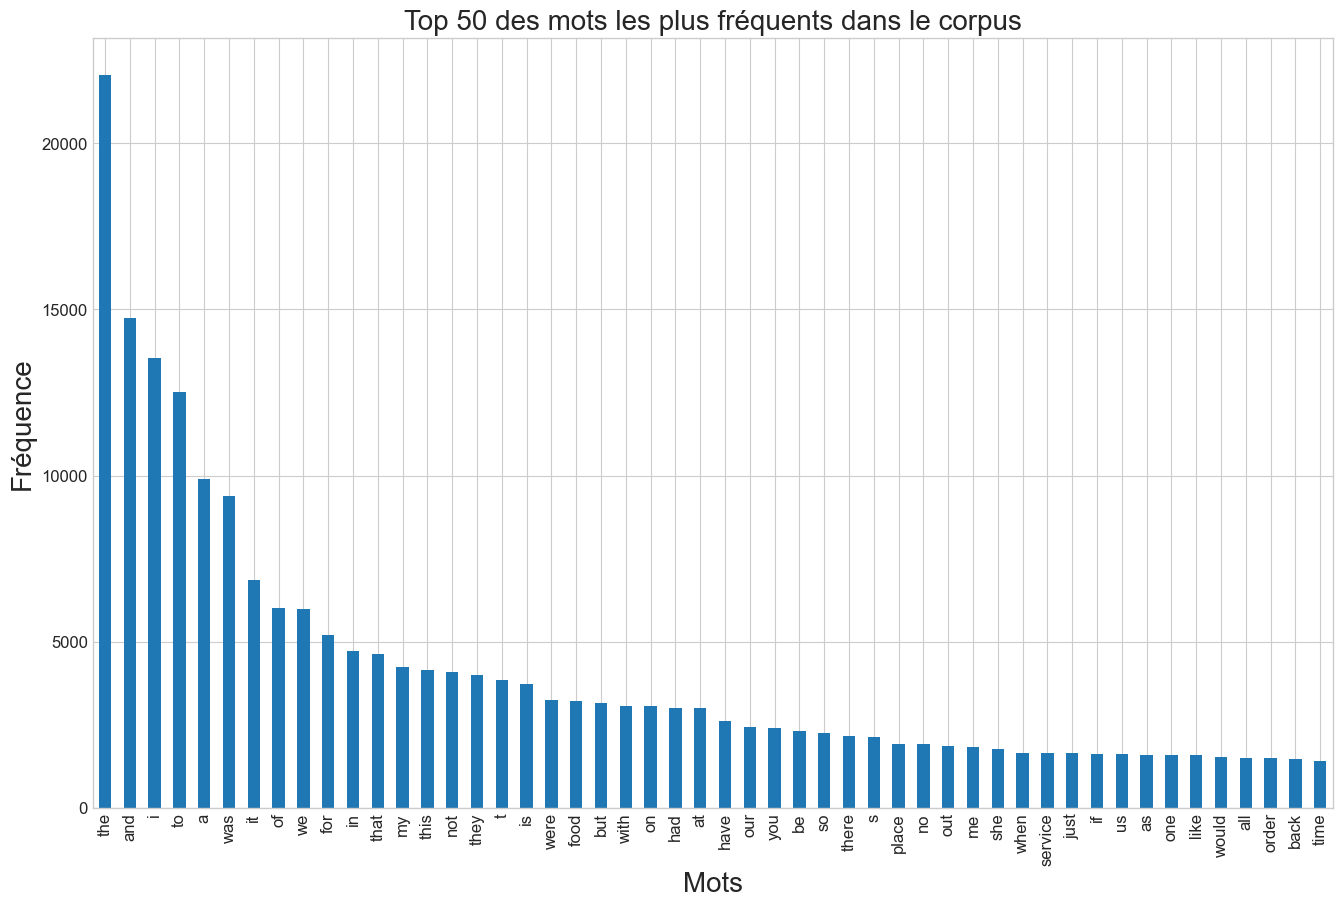

In [64]:
display_word_freq_hist(freq_totale, 50)

In [65]:
def display_wordcloud(data, max_words):
    extract = []
    for row in data:
        extract+= row

    extract = " ".join(extract)

    wordcloud = WordCloud(background_color = 'white',
                          max_words = max_words,
                          stopwords = []).generate(extract)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or

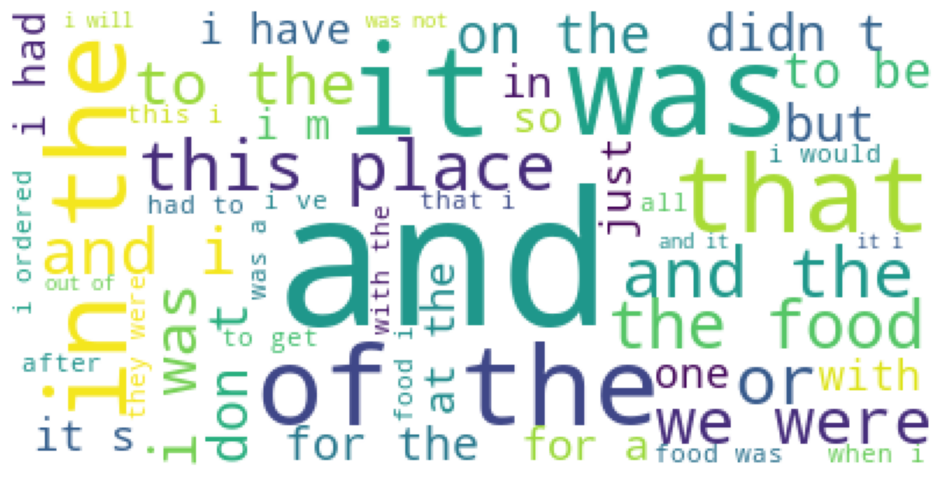

In [66]:
display_wordcloud(corpus, 50)

Les mots restants les plus fréquents n'ont pas de sens car ils sont trop communs, il est inutile de les garder. On va donc procéder à un second nettoyage.

### 3.2.2. Deuxième nettoyage

Supprimer les stop words 

Supprimer les mots de 3 lettres ou moins

Lemmatiser 

In [67]:
# Récupération des stop words en Anglais
sw = set()
sw.update(tuple(stopwords.words('english')))

In [68]:
lemmatizer = WordNetLemmatizer()

# Création d'un corpus de tokens
corpus_2 = []
for row in bad_reviews.index:
    tokens = tokenize_text(bad_reviews['text'][row])
    corpus_2.append([lemmatizer.lemmatize(w) for w in tokens if w not in sw and len(w) > 3])

# Calcul des fréquences des mots dans chaque texte
freq_2 = []
for row in corpus_2:
    freq_2.append(nltk.FreqDist(row))

# Fréquence totale de chaque mot pour l'ensemble du corpus
freq_totale_2 = nltk.Counter()
for fr in freq_2:
    freq_totale_2 += fr

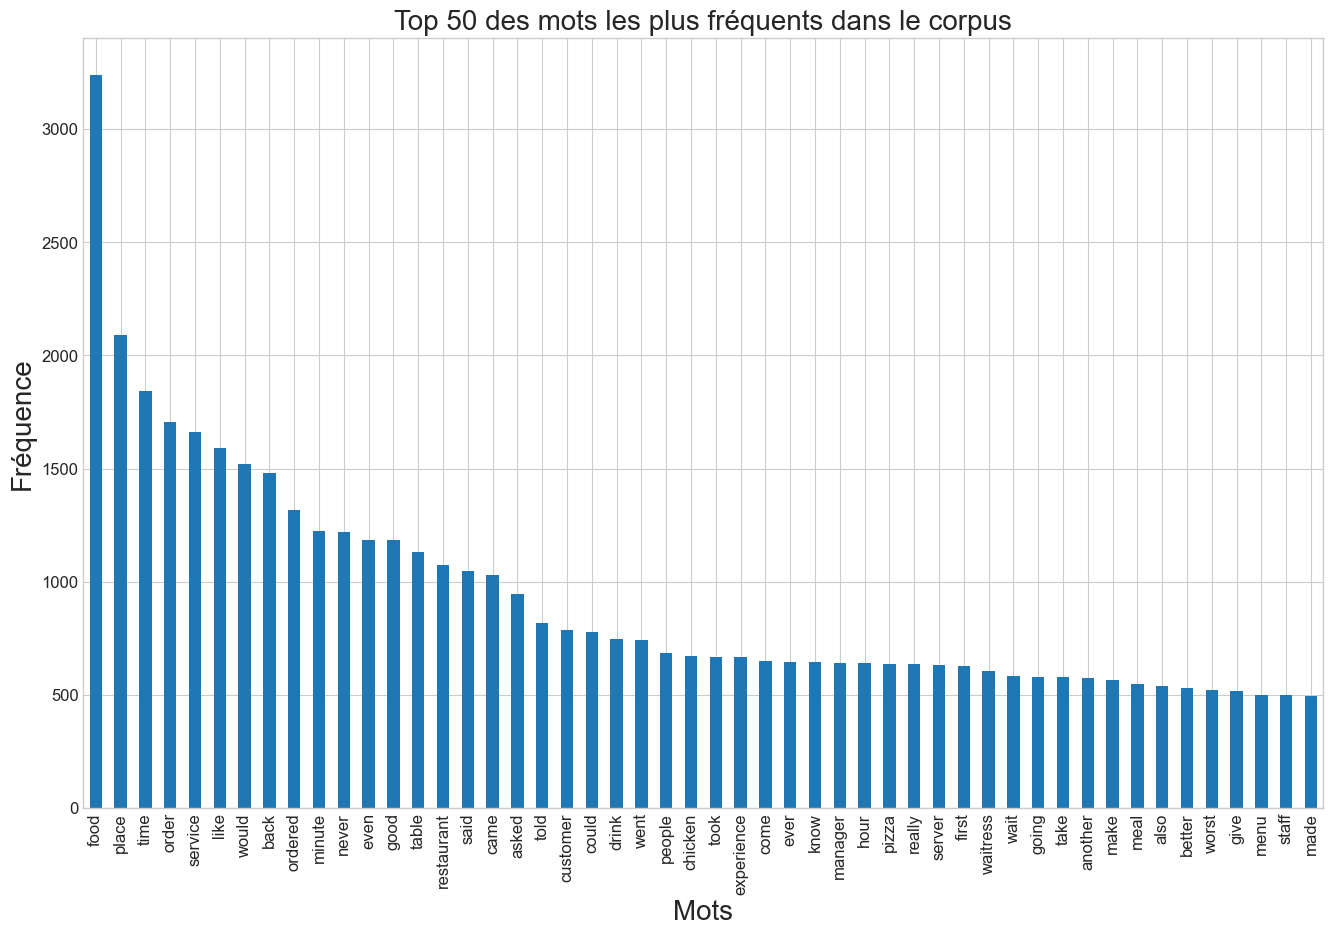

In [69]:
display_word_freq_hist(freq_totale_2, 50)

C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or

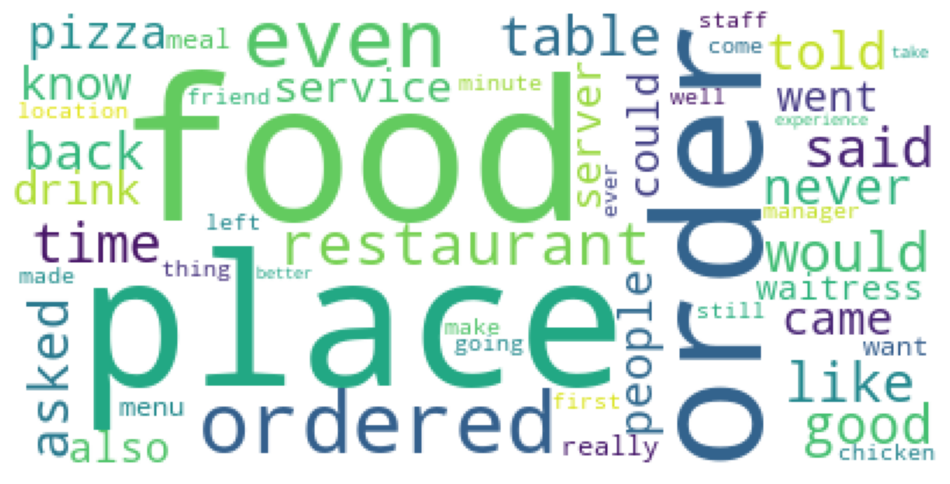

In [70]:
display_wordcloud(corpus_2, 50)

Après ce second nettoyage, notre tokenisation a plus de sens . Les mots,les plus fréquents sont du domaine de lieux et de sevice, peuvent être associés à un topic.

Cela nous donne également un aperçu de ce qui ressort le plus souvent dans les mauvaises reviews

#### 3.2.3. Vectorisation

On va créer une matrice de taille "nbr reviews * taille du vocabulaire" suivant 2 méthodes :

CountVectorizer : 

Calculer pour chaque review la fréquence d'apparition des différents mots de tous le vocabulaire

TfidfVectorizer : 

Calculer pour chaque review un rapport entre la fréquence d'apparition des mots dans la review et dans le corpus total.

Ces matrices sont ensuites utilisées par nos algorithmes pour faire par exemple du topic modeling.

In [71]:
def tokenize(text):
    tokens = tokenize_text(text)
    return [lemmatizer.lemmatize(w) for w in tokens if w not in sw and len(w) > 3]

In [72]:
cv = CountVectorizer(tokenizer=tokenize, stop_words=sw)
data_cv = cv.fit_transform(bad_reviews['text'])
data_cv_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_cv_dtm.index = bad_reviews.index
data_cv_dtm

aaaaanndd  aaron  aback  abacus  abalone  abandon  abandoned  \
15             0      0      0       0        0        0          0   
18             0      0      0       0        0        0          0   
29             0      0      0       0        0        0          0   
76             0      0      0       0        0        0          0   
77             0      0      0       0        0        0          0   
...          ...    ...    ...     ...      ...      ...        ...   
41253          0      0      0       0        0        0          0   
41255          0      0      0       0        0        0          0   
41269          0      0      0       0        0        0          0   
41282          0      0      0       0        0        0          0   
41294          0      0      0       0        0        0          0   

       abbreviated  abhorrent  abide  ...  ziosk  ziplock  ziti  zombie  zone  \
15               0          0      0  ...      0        0     0       0     0   
18               0          0      0  ...      0        0     0       0     0   
29               0          0      0  ...      0        0     0       0     0   
76               0          0      0  ...      0        0     0       0     0   
77               0          0      0  ...      0        0     0       0     0   
...            ...        ...    ...  ...    ...      ...   ...     ...   ...   
41253            0          0      0  ...      0        0     0       0     0   
41255            0          0      0  ...      0        0     0       0     0   
41269            0          0      0  ...      0        0     0       0     0   
41282            0          0      0  ...      0        0     0       0     0   
41294            0          0      0  ...      0        0     0       0     0   

       zorba  zucchini  zuccini  zuchinni  zydeco  
15         0         0        0         0       0  
18         0         0        0         0       0  
29         0         0        0         0       0  
76         0         0        0         0       0  
77         0         0        0         0       0  
...      ...       ...      ...       ...     ...  
41253      0         0        0         0       0  
41255      0         0        0         0       0  
41269      0         0        0         0       0  
41282      0         0        0         0       0  
41294      0         0        0         0       0  

[3807 rows x 11609 columns]

In [73]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=sw)
data_tfidf = tfidf.fit_transform(bad_reviews['text'])
data_tfidf_dtm = pd.DataFrame(data_tfidf.toarray(), columns=tfidf.get_feature_names_out())
data_tfidf_dtm.index = bad_reviews.index
data_tfidf_dtm

aaaaanndd  aaron  aback  abacus  abalone  abandon  abandoned  \
15           0.0    0.0    0.0     0.0      0.0      0.0        0.0   
18           0.0    0.0    0.0     0.0      0.0      0.0        0.0   
29           0.0    0.0    0.0     0.0      0.0      0.0        0.0   
76           0.0    0.0    0.0     0.0      0.0      0.0        0.0   
77           0.0    0.0    0.0     0.0      0.0      0.0        0.0   
...          ...    ...    ...     ...      ...      ...        ...   
41253        0.0    0.0    0.0     0.0      0.0      0.0        0.0   
41255        0.0    0.0    0.0     0.0      0.0      0.0        0.0   
41269        0.0    0.0    0.0     0.0      0.0      0.0        0.0   
41282        0.0    0.0    0.0     0.0      0.0      0.0        0.0   
41294        0.0    0.0    0.0     0.0      0.0      0.0        0.0   

       abbreviated  abhorrent  abide  ...  ziosk  ziplock  ziti  zombie  zone  \
15             0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
18             0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
29             0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
76             0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
77             0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
...            ...        ...    ...  ...    ...      ...   ...     ...   ...   
41253          0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
41255          0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
41269          0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
41282          0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   
41294          0.0        0.0    0.0  ...    0.0      0.0   0.0     0.0   0.0   

       zorba  zucchini  zuccini  zuchinni  zydeco  
15       0.0       0.0      0.0       0.0     0.0  
18       0.0       0.0      0.0       0.0     0.0  
29       0.0       0.0      0.0       0.0     0.0  
76       0.0       0.0      0.0       0.0     0.0  
77       0.0       0.0      0.0       0.0     0.0  
...      ...       ...      ...       ...     ...  
41253    0.0       0.0      0.0       0.0     0.0  
41255    0.0       0.0      0.0       0.0     0.0  
41269    0.0       0.0      0.0       0.0     0.0  
41282    0.0       0.0      0.0       0.0     0.0  
41294    0.0       0.0      0.0       0.0     0.0  

[3807 rows x 11609 columns]

#### 3.2.4. Topic Modeling avec Latent Dirichlet Allocation

On veut identifier des topics à partir des reviews pour essayer de comprendre ce qui rend les clients insatisfaits avec LDA.

In [74]:
# Create a corpus from a list of texts
common_dictionary = Dictionary(corpus_2)
common_corpus = [common_dictionary.doc2bow(text) for text in corpus_2]

##### 3.2.4.1. Premier essai

Cet algorithme prend en entrée un hyperparamètre "num_topics" permettant de définir le nombre de topics que l'on veut extraire.

In [75]:
lda = models.LdaModel(corpus=common_corpus, id2word=common_dictionary, num_topics=4)
lda.print_topics()

[(0,
  '0.020*"food" + 0.016*"place" + 0.011*"like" + 0.009*"ordered" + 0.009*"back" + 0.009*"never" + 0.008*"order" + 0.007*"time" + 0.007*"chicken" + 0.005*"even"'),
 (1,
  '0.016*"food" + 0.011*"would" + 0.010*"service" + 0.009*"time" + 0.009*"table" + 0.008*"place" + 0.008*"good" + 0.007*"back" + 0.007*"never" + 0.007*"told"'),
 (2,
  '0.013*"food" + 0.011*"time" + 0.008*"restaurant" + 0.008*"good" + 0.007*"like" + 0.007*"service" + 0.006*"place" + 0.006*"would" + 0.006*"minute" + 0.006*"never"'),
 (3,
  '0.015*"food" + 0.014*"order" + 0.010*"service" + 0.010*"place" + 0.008*"said" + 0.008*"time" + 0.008*"back" + 0.008*"minute" + 0.007*"ordered" + 0.007*"would"')]

In [76]:
# Perplexity
print('\nPerplexity: ', lda.log_perplexity(common_corpus))  # a measure of how good the model is. lower the better.

# Coherence Score
coherence_model_lda = models.CoherenceModel(model=lda, texts=corpus_2, dictionary=common_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.649785799005304

Coherence Score:  0.3632872763700711


In [77]:
# Visualisation des topics
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda, common_corpus, common_dictionary)

C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.013007  0.021481       1        1  32.568111
0      0.038824  0.007771       2        1  25.968738
1     -0.025801  0.000881       3        1  23.161601
2     -0.000015 -0.030133       4        1  18.301549, topic_info=        Term         Freq        Total Category  logprob  loglift
18   chicken   640.000000   640.000000  Default  30.0000  30.0000
79      good  1120.000000  1120.000000  Default  29.0000  29.0000
41     would  1416.000000  1416.000000  Default  28.0000  28.0000
114    table  1077.000000  1077.000000  Default  27.0000  27.0000
30     never  1196.000000  1196.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
13      back   167.378349  1439.682792   Topic4  -5.3548  -0.4537
415     said   137.862934  1035.948343   Topic4  -5.5488  -0.3186
4      order   136.385825  1703.871298   Topic4  -5.5596  -0.8270
290    asked   117.749884   941.645010   Topic4  -5.7065  -0.3809
118     went   112.936153   714.163894   Topic4  -5.7483  -0.1461

[365 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
4426      1  0.867618          ability
3529      1  0.072372  acknowledgement
3529      3  0.072372  acknowledgement
3529      4  0.796093  acknowledgement
783       1  0.096640            aisle
...     ...       ...              ...
41        4  0.158150            would
704       1  0.196232             yuck
704       2  0.686811             yuck
704       3  0.065411             yuck
704       4  0.065411             yuck

[719 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or

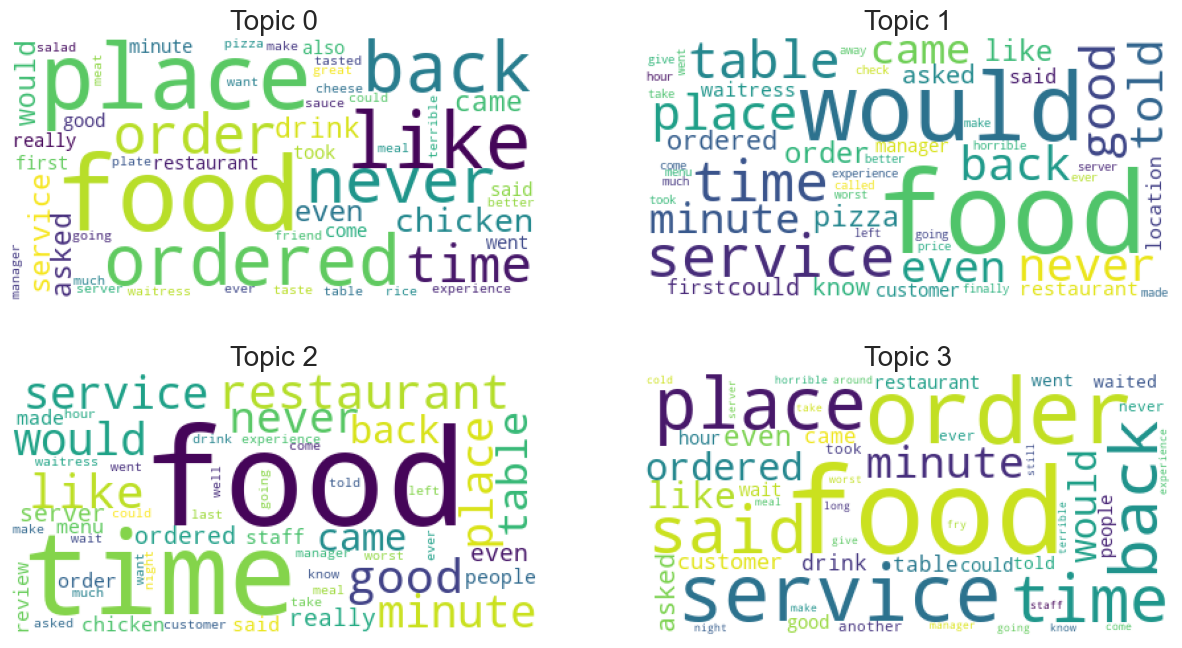

In [78]:
# On affiche le nuage de mots de chaque topic
nbr_rows = int(lda.num_topics/2) if lda.num_topics % 2 == 0 else int((lda.num_topics+1)/2)
index = 1

fig, axs = plt.subplots(nbr_rows, 2, figsize=(15,4*nbr_rows))

for t in range(lda.num_topics):
    plt.subplot(nbr_rows, 2, index)
    plt.imshow(WordCloud(background_color = 'white').fit_words(dict(lda.show_topic(t, 50))))
    plt.axis("off")
    plt.title("Topic " + str(t))

    index+=1

plt.show()

Les quatre Topics correspondents:

Topic 0 : lieu 

Topic 1 : temps de service

Topic 2 : temps 

Topic 3 : service

##### 3.2.4.1. Deuxième essai

On va retravailler notre corpus en complétant le nettoyage des reviews de notre jeu de données en gardant seulement les noms.

In [79]:
lemmatizer = WordNetLemmatizer()

# Création d'un corpus de tokens
corpus_3 = []
for row in bad_reviews.index:
    tokens = tokenize_text(bad_reviews['text'][row])
    corpus_3.append([lemmatizer.lemmatize(w) for w in tokens if w not in sw and len(w) > 3])

# On garde seulement les noms
corpus_3_cleaned = []
for element in corpus_3:
    pos_tag = nltk.pos_tag(element)
    if len(pos_tag) > 1:
        pos_tag_cleaned = list(zip(*[word for word in pos_tag if word[1] == 'NN']))
        if len(pos_tag_cleaned) > 1 :
            corpus_3_cleaned.append(list(pos_tag_cleaned[0]))

# Calcul des fréquences des mots dans chaque texte
freq_3 = []
for row in corpus_3_cleaned:
    freq_3.append(nltk.FreqDist(row))

# Fréquence totale de chaque mot pour l'ensemble du corpus
freq_totale_3 = nltk.Counter()
for fr in freq_3:
    freq_totale_3 += fr

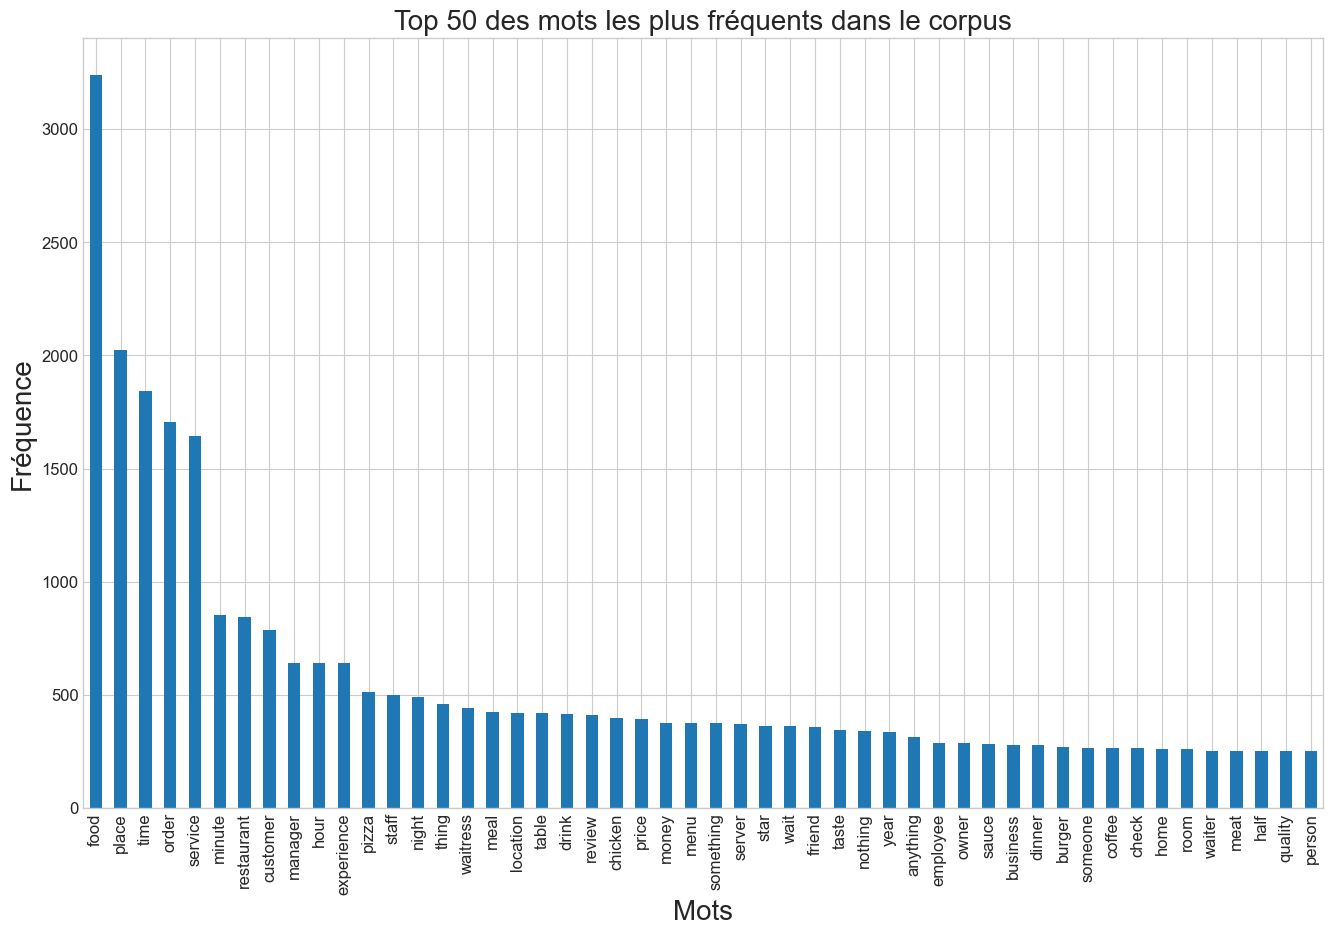

In [80]:
display_word_freq_hist(freq_totale_3, 50)

C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpos

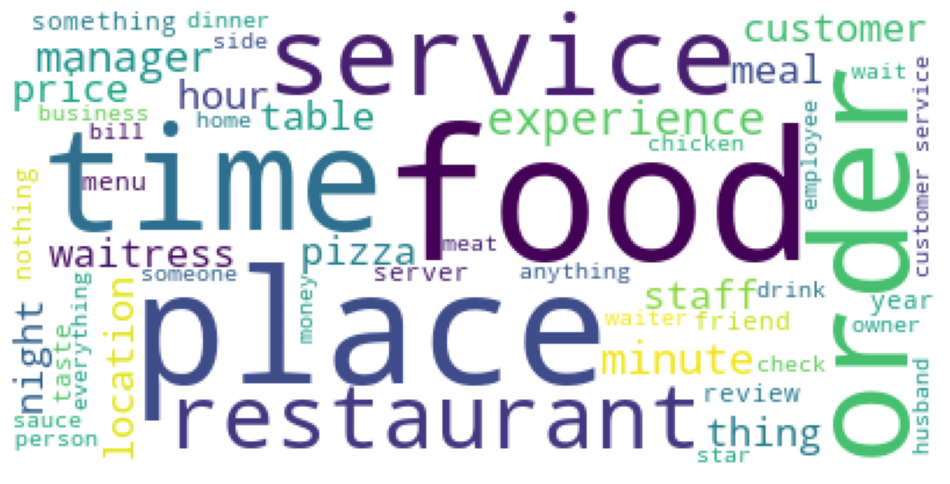

In [81]:
display_wordcloud(corpus_3_cleaned, 50)

##### 3.2.4.1. LDA

On va  utiliser la technique LDA sur ce nouveau corpus. On va déterminer quel est le meilleur hyperparamètre nump_topic à prendre en fonction du coherence score.

In [82]:
# Calcul le coherence score pour plusieurs valeurs de l'hyperparamètres num_topic
def compute_coherence_values(dictionnary, corpus, texts):

    coherences_values = []
    model_list = []

    for num_topic in range(2, 21, 1):
        model = models.LdaModel(corpus=corpus, id2word=dictionnary, num_topics=num_topic)
        model_list.append(model)

        coherence_model = models.CoherenceModel(model=model, texts=texts, dictionary=dictionnary, coherence='c_v')
        coherences_values.append(coherence_model.get_coherence())
    
    return model_list, coherences_values

In [83]:
# Create a corpus from a list of texts
common_dictionary = Dictionary(corpus_3_cleaned)
common_corpus = [common_dictionary.doc2bow(text) for text in corpus_3_cleaned]

model_list, coherence_values = compute_coherence_values(common_dictionary, common_corpus, corpus_3_cleaned)

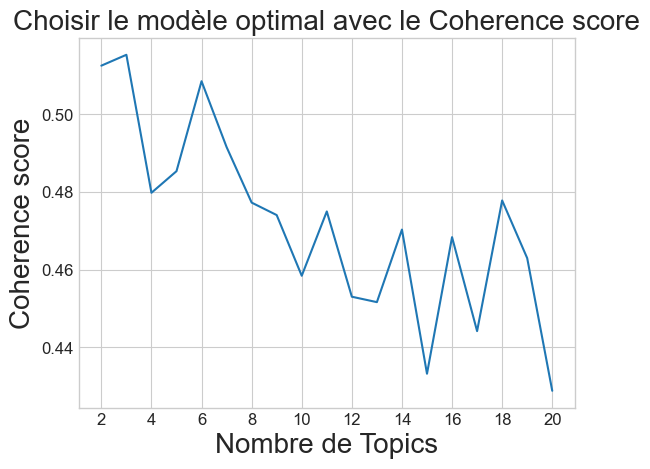

In [84]:
# Graphe d'évolution du coherence score
x = range(2, 21, 1)
plt.plot(x, coherence_values)
plt.xticks(range(2, 21, 2))
plt.xlabel("Nombre de Topics")
plt.ylabel("Coherence score")
plt.title("Choisir le modèle optimal avec le Coherence score")
plt.show()

La cohérence score augmente légerment à partir de 2 et chute à partir de 3 jusqu'à arriver un minimum dà 20 Topics.

Pour la suite on va prendre un nombre de topics de 4.

In [85]:
lda = model_list[4]
lda.print_topics()

[(0,
  '0.029*"food" + 0.026*"service" + 0.026*"time" + 0.018*"place" + 0.017*"restaurant" + 0.012*"order" + 0.012*"pizza" + 0.010*"night" + 0.008*"manager" + 0.008*"drink"'),
 (1,
  '0.052*"food" + 0.020*"service" + 0.014*"server" + 0.014*"meal" + 0.013*"waitress" + 0.013*"place" + 0.012*"order" + 0.012*"hour" + 0.009*"experience" + 0.009*"restaurant"'),
 (2,
  '0.040*"order" + 0.033*"time" + 0.027*"food" + 0.024*"place" + 0.022*"minute" + 0.021*"service" + 0.017*"customer" + 0.013*"manager" + 0.012*"hour" + 0.010*"wait"'),
 (3,
  '0.057*"food" + 0.038*"place" + 0.019*"order" + 0.016*"pizza" + 0.014*"time" + 0.014*"service" + 0.011*"chicken" + 0.011*"restaurant" + 0.010*"meat" + 0.009*"sauce"'),
 (4,
  '0.043*"food" + 0.025*"place" + 0.020*"service" + 0.017*"time" + 0.012*"experience" + 0.010*"staff" + 0.009*"manager" + 0.008*"thing" + 0.008*"customer" + 0.008*"restaurant"'),
 (5,
  '0.019*"food" + 0.017*"place" + 0.017*"coffee" + 0.015*"order" + 0.012*"time" + 0.011*"service" + 0.010

In [86]:
# Perplexity
print('\nPerplexity: ', lda.log_perplexity(common_corpus))  # a measure of how good the model is. lower the better.

# Coherence Score
coherence_model_lda = models.CoherenceModel(model=lda, texts=corpus_3_cleaned, dictionary=common_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.098887101696602

Coherence Score:  0.5084796853476757


In [87]:
# Visualisation des topics
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda, common_corpus, common_dictionary)

C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.026597 -0.056024       1        1  30.956160
3      0.027805  0.067536       2        1  18.985340
4      0.025903 -0.003034       3        1  16.347416
0      0.008134 -0.050923       4        1  14.411499
1      0.024080  0.035732       5        1  12.987764
5     -0.112519  0.006714       6        1   6.311822, topic_info=         Term         Freq        Total Category  logprob  loglift
20       food  3077.000000  3077.000000  Default  30.0000  30.0000
618    coffee   244.000000   244.000000  Default  29.0000  29.0000
152     pizza   496.000000   496.000000  Default  28.0000  28.0000
233    server   367.000000   367.000000  Default  27.0000  27.0000
44      place  1912.000000  1912.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
124      wait    21.545483   337.460543   Topic6  -5.4576   0.0115
17   customer    25.130851   769.446024   Topic6  -5.3037  -0.6588
229  waitress    21.852425   424.992169   Topic6  -5.4434  -0.2050
2      minute    23.164283   823.384614   Topic6  -5.3851  -0.8081
36       hour    21.726957   605.969862   Topic6  -5.4492  -0.5655

[488 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2204      4  0.915452      ability
4153      4  0.911538      absence
2583      2  0.904593         acai
3023      2  0.794776         ache
3267      6  0.885755  acknowledge
...     ...       ...          ...
331       5  0.103848         year
331       6  0.035698         year
766       2  0.803368         yuck
766       3  0.107116         yuck
766       4  0.053558         yuck

[1112 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2, 6])

C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\benab\anaconda3\envs\opencv_env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or

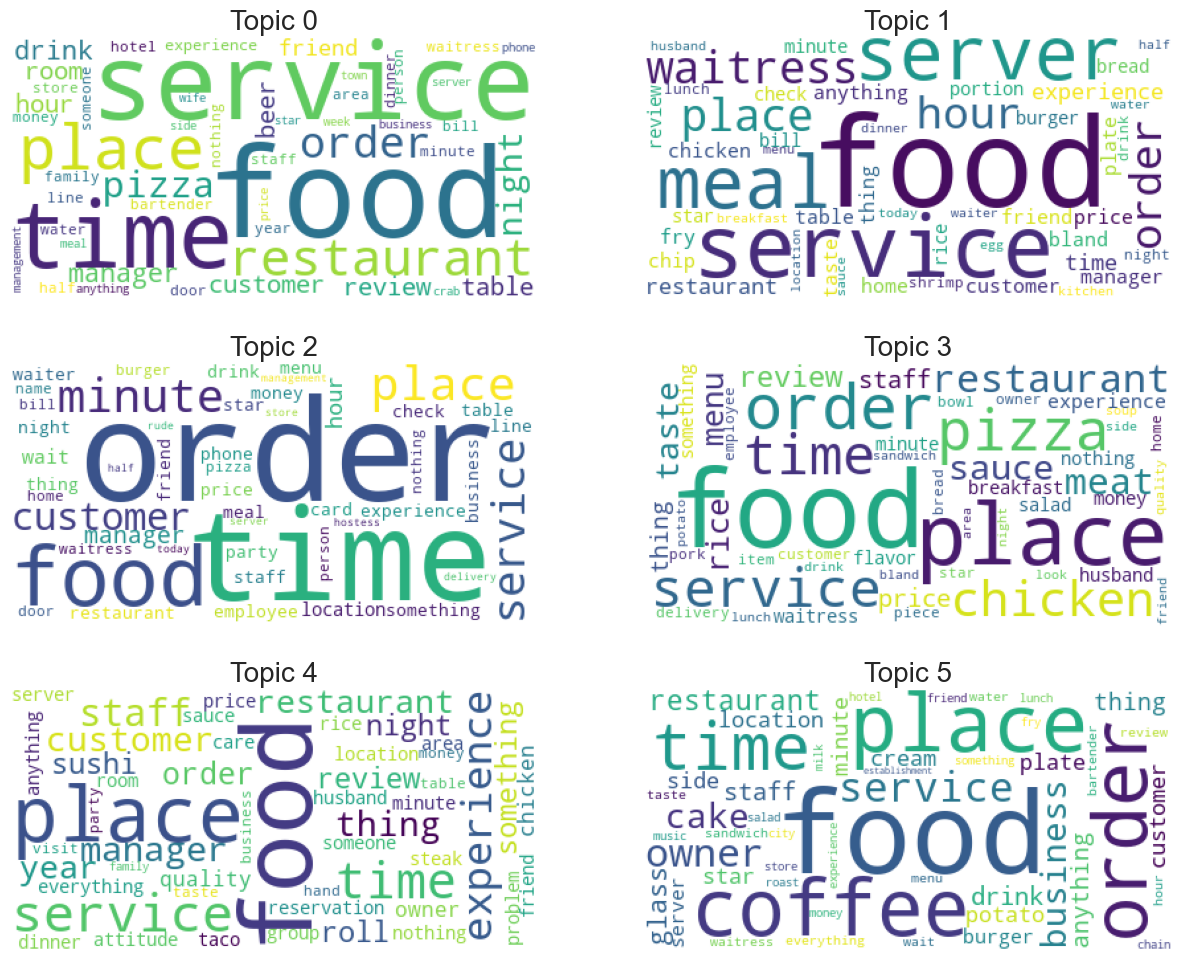

In [88]:
# On affiche le nuage de mots de chaque topic
nbr_rows = int(lda.num_topics/2) if lda.num_topics % 2 == 0 else int((lda.num_topics+1)/2)
index = 1

fig, axs = plt.subplots(nbr_rows, 2, figsize=(15,4*nbr_rows))

for t in range(lda.num_topics):
    plt.subplot(nbr_rows, 2, index)
    plt.imshow(WordCloud(background_color = 'white').fit_words(dict(lda.show_topic(t, 50))))
    plt.axis("off")
    plt.title("Topic " + str(t))

    index+=1

plt.show()

Topic 0 : service

Topic 1 : service

Topic 2 : temps

Topic 3 : nouriture

On en conclue que les clients ne sont plutôt satisfait du service et de la nouriture.

Il est donc possible de Détecter les sujets d’insatisfaction grâce au Topic Modeling. Les sujets remontés sont pertinents par rapport à notre contexte qui est « restauration », on a ici utilisé la méthode LDA